In [78]:
import requests
from requests.auth import HTTPBasicAuth
import csv
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt

In [3]:
# get credentials
with open('ravelry_auth.csv') as f:
    reader = csv.reader(f)
    rav_auth = list(reader)

In [4]:
# Get pattern id's for specific query
URL = "https://api.ravelry.com/patterns/search.json"
PARAMS = {'query':'cardigan', 'page': 1, 'weight': 'worsted'}

r1 = requests.get(url = URL, params = PARAMS, auth=HTTPBasicAuth(rav_auth[0][0], rav_auth[0][1])) 

In [5]:
# convert ID format for next query
r1_json = r1.json()
id_list = ''
for key in range(len(r1_json['patterns'])):
    id_list += (str(r1_json['patterns'][key]['id']) + ' ')
id_list = id_list[:-1]
#print(id_list)

In [6]:
# get pattern details
URL = "https://api.ravelry.com/patterns.json"
PARAMS = {'ids':id_list}

r2 = requests.get(url = URL, params = PARAMS, auth=HTTPBasicAuth(rav_auth[0][0], rav_auth[0][1]))
#print(r2.url)

In [7]:
r2_json = r2.json()
patterns = r2_json['patterns']

In [ ]:
"""Let's try making a plot with some of this data.
I have a theory that patterns that have been around longer
will have more favorites (Favorites = "likes"). 
Is that true?"""

In [8]:
# Make dictionary of cases with valid publication dates
plot_data = {}
for key in patterns:
    pubdate = patterns[key]['published']
    if pubdate is not None:
        plot_data[datetime.strptime(pubdate, '%Y/%m/%d').date()] = patterns[key]['favorites_count']
#print(plot_data)

Text(0.5, 1.0, 'Favorites vs pattern age for worsted weight cardigans')

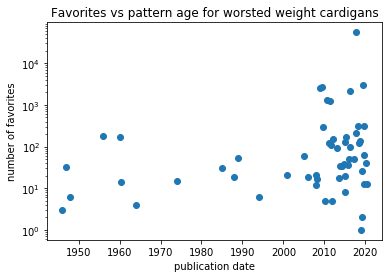

In [11]:
# Make plot of publication date versus number of favorites
x,y = zip(*sorted(plot_data.items()))
plt.plot_date(x,y)
plt.yscale('log') # log scale because of large outliers
plt.xlabel('publication date')
plt.ylabel('number of favorites')
plt.title('Favorites vs pattern age for worsted weight cardigans')

In [ ]:
"""Ravelry didn't exist in 1950! Let's limit the plot to when the website existed.
Patterns that were published earlier during the Ravelry era have had more time to 
be seen on the website and gather attention."""

Text(0.5, 1.0, 'Favorites vs pattern age for worsted weight cardigans')

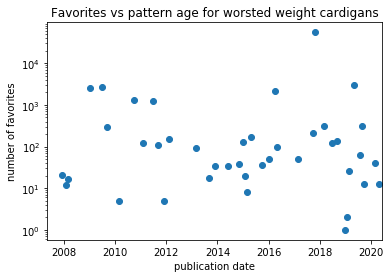

In [12]:
plt.plot_date(x,y)
plt.yscale('log') # log scale because of large outliers
plt.xlim([date(2007, 5, 1), datetime.now()])
plt.xlabel('publication date')
plt.ylabel('number of favorites')
plt.title('Favorites vs pattern age for worsted weight cardigans')

In [99]:
"""This plot doesn't show a clear relationship between the age of a pattern and the 
number of favorites. I'll do a linear fit to see if it explains any of the variance."""

"This plot doesn't show a clear relationship between the age of a pattern and the \nnumber of favorites. I'll do a linear fit to see if it explains any of the variance."

In [97]:
X=[(item - date(1900,1,1)).days for item in x]
X=tuple(X) # consistent with y

# fit exponetial line
p = np.polyfit(X, np.log(y), 1)
print('R^2 = ',str(p[0]**2))

# generate line to plot with data
date_list = [date(2007,5,1) + timedelta(days=d) for d in range(20*365)]
days_list = [(my_date - date(1900,1,1)).days for my_date in date_list]
my_fit = np.exp([num * p[0] for num in days_list] + p[1])

R^2 =  4.866673846498209e-09


In [ ]:
"""With such a low R^2 value, this fit doesn't explain any of the 
variability in the post 2007 data - supporting what we saw in the plots above.
Next we'll add this fit to the graph to help visualize that. """

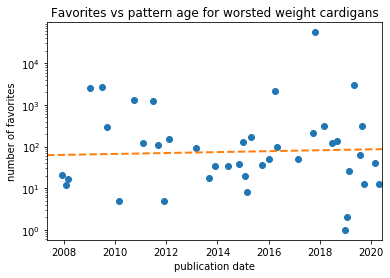

In [96]:
plt.plot_date(x,y)
plt.yscale('log') # log scale because of large outliers
plt.xlim([date(2007, 5, 1), datetime.now()])
plt.xlabel('publication date')
plt.ylabel('number of favorites')
plt.title('Favorites vs pattern age for worsted weight cardigans')
plt.plot(date_list, my_fit , linewidth = 2, linestyle = 'dashed')

In [ ]:
"""Based on this analysis, it doesn't seem like the age of a pattern 
has anything to do with the number of favorites it has for patterns 
that were published during the Ravelry era"""